# Heart Disease Prediction using Machine Learning

According to Center for Disease Control and Prevention CDC, heart disease refers to several types of heart conditions. Coronary artery diease CAD, is considered the most common type of heart disease in the United States. It is common to have this disease without knowing and most at times people get to find out after experiencing symptoms like heart attack, heart failure, or an arrhythmia.

Key risk factors associated with heart disease are high blood pressure, high blood cholesterol, and smoking. According to CDC, 47% of Americans have at least one of these risk factors and others are exposed to it based on their lifestyle choices and medical conditions such as diabetes, overweight and obesity, unhealthy diet, physical inactivity and use of excessive alcohol.

This study aim to demonstrate the key risk factors of heart disease and to predict whether a patient has heart disease or not through a couple of machine learning algorithms.

In [1]:
# Import the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cm import rainbow
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

import warnings
warnings.simplefilter(action ='ignore')

%matplotlib inline

In [2]:
# Load the dataset

df = pd.read_csv('heart disease.csv')

In [3]:
# A glance of what the data looks like

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Data contains;

- age - age in years
- sex - (1 = male; 0 = female)
- cp - chest pain type
- trestbps - resting blood pressure (in mm Hg on admission to the hospital)
- chol - serum cholestoral in mg/dl
- fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg - resting electrocardiographic results
- thalach - maximum heart rate achieved
- exang - exercise induced angina (1 = yes; 0 = no)
- oldpeak - ST depression induced by exercise relative to rest
- slope - the slope of the peak exercise ST segment
- ca - number of major vessels (0-3) colored by flourosopy
- thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
- target - have disease or not (1=yes, 0=no)
  


## 1. Exploratory Data Analysis

In [4]:
# Check for the shape of the datasets(number of rows and columns)

df.shape

(303, 14)

In [5]:
# Information about the features of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# Descriptive statistics of the dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [7]:
# Check for imbalance/distribution of the target variable.

df['target'].value_counts()*100/len(df)

1    54.455446
0    45.544554
Name: target, dtype: float64

In [8]:
# Exame the class of the target variable

df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

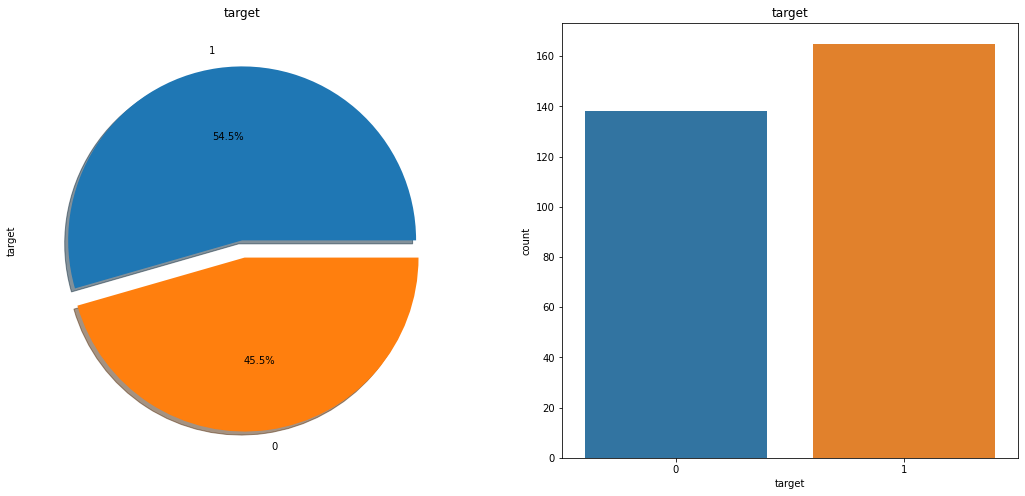

In [9]:
# Plot the distribution
f,ax=plt.subplots(1,2,figsize=(18,8))
df['target'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
sns.countplot('target',data=df,ax=ax[1])
ax[1].set_title('target')
plt.show()

In [10]:
# Check for null values in the datasets

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:xlabel='target', ylabel='Density'>

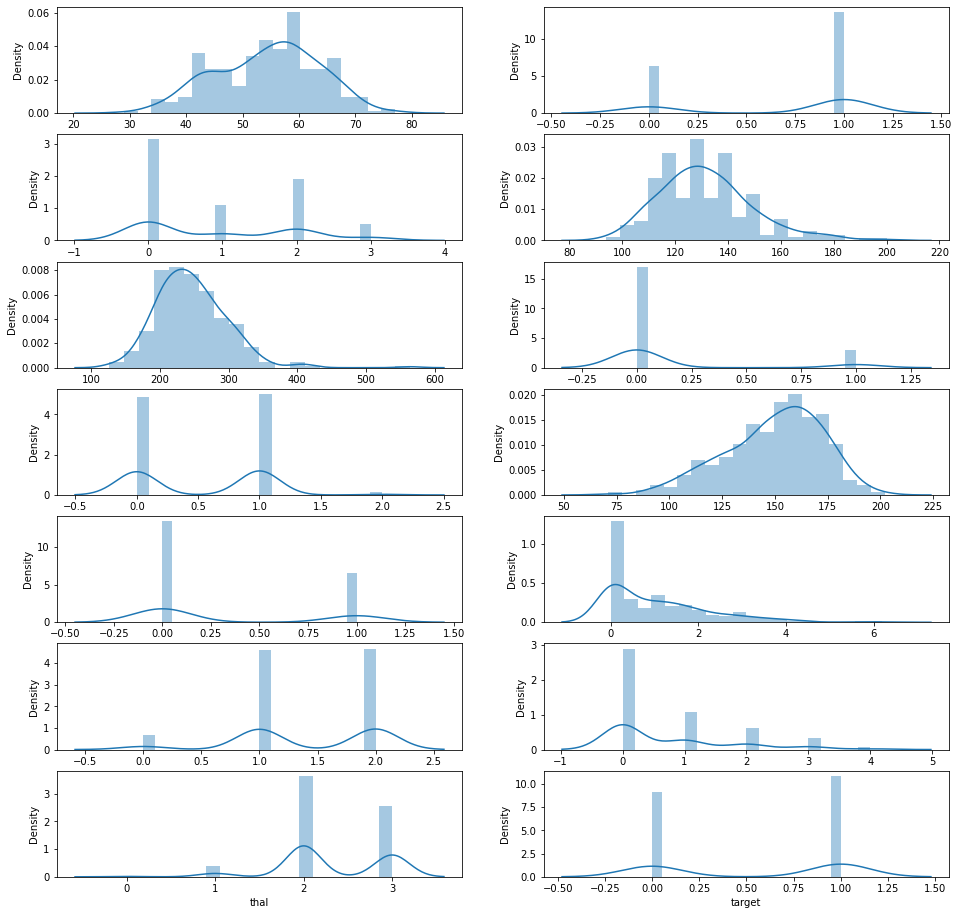

In [11]:
# Histogram and density graph of all variables

fig, ax = plt.subplots(7,2, figsize=(16,16))
sns.distplot(df.age, bins = 20, ax=ax[0,0]) 
sns.distplot(df.sex, bins = 20, ax=ax[0,1]) 
sns.distplot(df.cp, bins = 20, ax=ax[1,0]) 
sns.distplot(df.trestbps, bins = 20, ax=ax[1,1]) 
sns.distplot(df.chol, bins = 20, ax=ax[2,0])
sns.distplot(df.fbs, bins = 20, ax=ax[2,1])
sns.distplot(df.restecg, bins = 20, ax=ax[3,0]) 
sns.distplot(df.thalach, bins = 20, ax=ax[3,1]) 
sns.distplot(df.exang, bins = 20, ax=ax[4,0])
sns.distplot(df.oldpeak, bins = 20, ax=ax[4,1]) 
sns.distplot(df.slope, bins = 20, ax=ax[5,0]) 
sns.distplot(df.ca, bins = 20, ax=ax[5,1])
sns.distplot(df.thal, bins = 20, ax=ax[6,0]) 
sns.distplot(df.target, bins = 20, ax=ax[6,1]) 

In [12]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


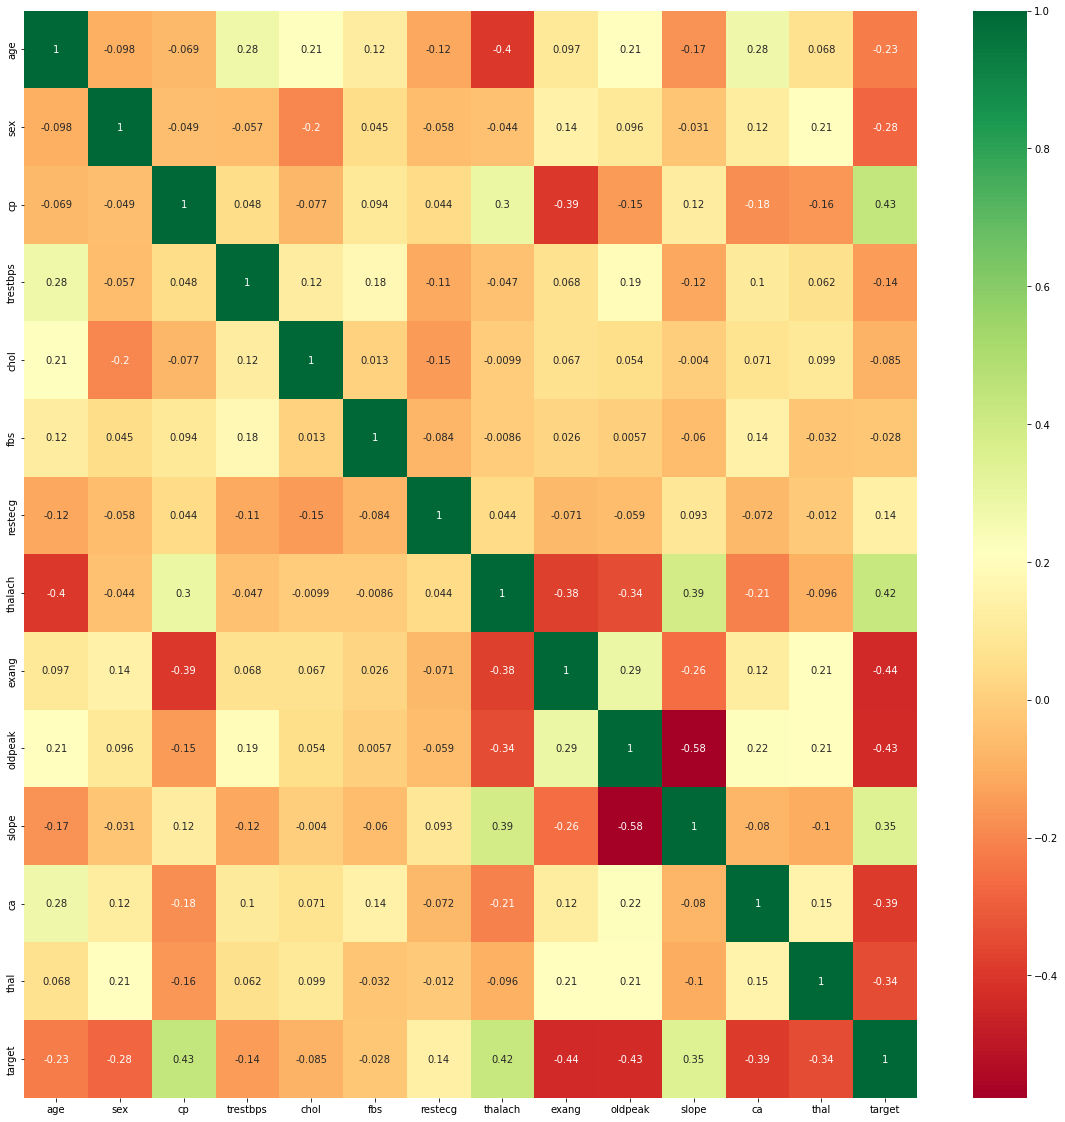

In [13]:
correlation = df.corr()
plt.figure(figsize=(20,20))
g = sns.heatmap(correlation,annot =True,cmap='RdYlGn')

## 2. Data Pre-processing

In [14]:
# Since 'cp', 'thal', and 'slope' are categorical in nature, we will turn them into dummy variables

a = pd.get_dummies(df['cp'], prefix = 'cp')
b = pd.get_dummies(df['slope'], prefix = 'slope')
c = pd.get_dummies(df['thal'], prefix = 'thal')

frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,1,0,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,1,0,0,0,0,1,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,1,0
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,1,0
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,1,0


In [15]:
df = df.drop( columns = ['cp','slope','thal'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,1,0,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,1,0,0,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,1,0
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,1,0
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,1,0


In [16]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])

In [17]:
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,0.952197,1,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,...,0,0,1,1,0,0,0,1,0,0
1,-1.915313,1,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,...,0,1,0,1,0,0,0,0,1,0
2,-1.474158,0,-0.092738,-0.816773,0,0,0.977514,0,0.310912,0,...,1,0,0,0,0,1,0,0,1,0
3,0.180175,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,0,...,1,0,0,0,0,1,0,0,1,0
4,0.290464,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,0,...,0,0,0,0,0,1,0,0,1,0


In [18]:
y = df['target']
X = df.drop(['target'], axis = 1)

## 3. Model Building

In [99]:
# Cross validation score of all base models

models = []
models.append(('Logistic Regression', LogisticRegression(random_state = 12345)))
models.append(('Neareast Neighbors', KNeighborsClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier(random_state = 12345)))
models.append(('Random Forest', RandomForestClassifier(random_state = 12345)))
models.append(('Support Vector Machine', SVC(gamma = 'auto', random_state = 12345)))
models.append(('Gradient Boosting', GradientBoostingClassifier(random_state = 12345)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345)))

names = []
result = []

for name, model in models:
    scores = cross_val_score(model, X, y, cv=10)
    names.append(name)
    result.append(scores)
    print(f'{name}: {scores.mean():.4f}')

Logistic Regression: 0.8282
Neareast Neighbors: 0.8284
Decision Tree: 0.7319
Random Forest: 0.8348
Support Vector Machine: 0.8546
Gradient Boosting: 0.8148
LightGBM: 0.7980


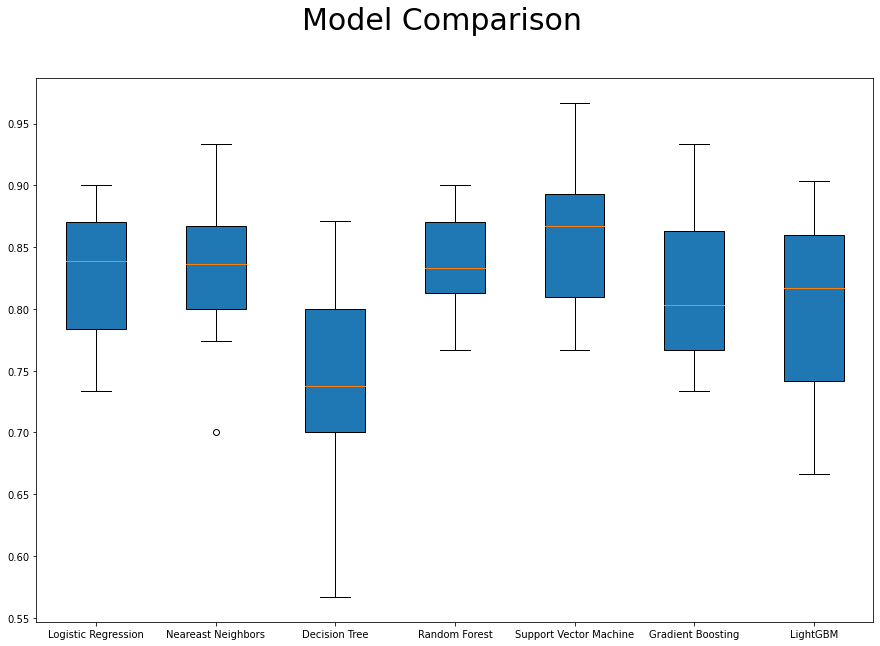

In [33]:
# Plot the outcome in a boxplot
fig = plt.figure(figsize=(15,10))
fig.suptitle('Model Comparison',fontsize=30)
box_plot=plt.boxplot(result,patch_artist=True,labels=names)


## 4. Model Tuning

### 4.1 Random Forest Tuning

In [55]:
rf_params = {"n_estimators" :[100,200,500,1000],
             "max_depth": [3,5,8,None],
             "min_samples_split": [2,5,10,30],
             "max_features": [3,5,7],
             "min_samples_leaf":[1,3,5,8]}

rf_model = RandomForestClassifier(random_state = 42)

rs_rf = RandomizedSearchCV(rf_model, rf_params, cv=10, n_jobs = -1, verbose = 2).fit(X, y)

rs_rf.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


{'n_estimators': 200,
 'min_samples_split': 30,
 'min_samples_leaf': 5,
 'max_features': 5,
 'max_depth': 5}

#### 4.1.1 Final Model After Tuning

In [89]:
rf_best_model = RandomForestClassifier(**rs_rf.best_params_,random_state=42).fit(X,y)
cross_val_score(rf_best_model, X, y, cv=10).mean()

0.8546236559139786

Text(0.5, 1.0, 'Predictor Variable Severity Levels')

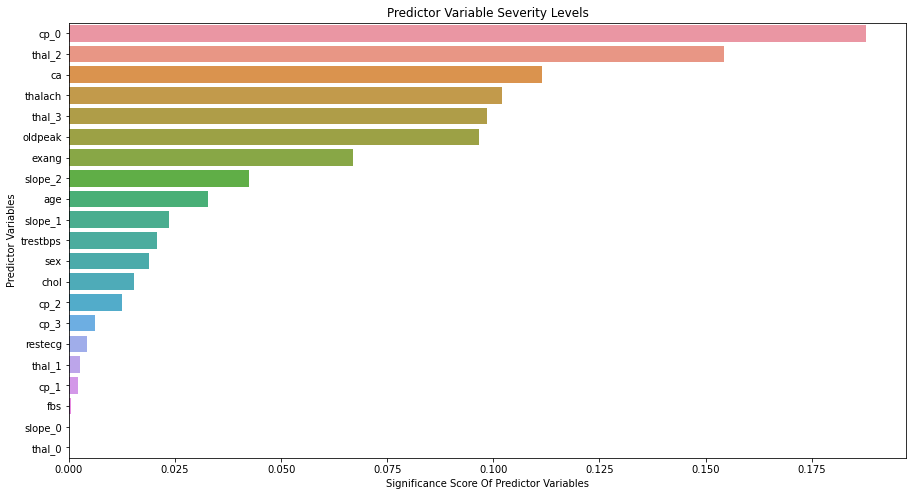

In [90]:
rf_best_model.feature_importances_
feature = pd.Series(rf_best_model.feature_importances_, index=X.columns).sort_values(ascending=False)

fig = plt.figure(figsize=(15,8))
sns.barplot(x=feature, y=feature.index)
plt.xlabel('Significance Score Of Predictor Variables')
plt.ylabel('Predictor Variables')
plt.title("Predictor Variable Severity Levels")


### 4.2 Support Vector Machine Tuning

In [91]:
svm_params = {"C" :[1.0,3.0,5.0,10.0],
             "degree": [1,3,5,8],
             "gamma": ['scale','auto'],
             "kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
             "coef0":[1.0,3.0,5.0,8.0]}

rs_svm_model = SVC(random_state = 42)

rs_svm = RandomizedSearchCV(svm_model, svm_params, cv=10, n_jobs = -1, verbose = 2).fit(X, y)

rs_svm.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


{'kernel': 'rbf', 'gamma': 'auto', 'degree': 3, 'coef0': 3.0, 'C': 3.0}

#### 4.2.1 Final Model After Tuning

In [92]:
svm_best_model = SVC(**rs_svm.best_params_,random_state=42).fit(X,y)
cross_val_score(svm_best_model, X, y, cv=10).mean()

0.8313978494623656

### 4.3 Logistic Regression Tuning

In [93]:
lr_params = {'penalty': ['l2','none'],
             'tol': [1.0,3.0],
             'C': [0.5,1.0]
    
}

lr_model = LogisticRegression(random_state=42)
rs_lr = RandomizedSearchCV(lr_model, lr_params, cv=10, n_jobs = -1, verbose = 2).fit(X, y)
rs_lr.best_params_

Fitting 10 folds for each of 8 candidates, totalling 80 fits


{'tol': 3.0, 'penalty': 'l2', 'C': 1.0}

#### 4.3.1 Final Model After Tuning

In [94]:

lr_best_model = LogisticRegression(**rs_lr.best_params_,random_state=42).fit(X,y)
cross_val_score(lr_best_model, X, y, cv=10).mean()

0.8283870967741935

## 5. Overview of Top Performing Models 

In [95]:
result =[]
names =[]

models = [('Logistc regression',cross_val_score(lr_best_model, X, y, cv=10)),
         ('Support Vector Machine',cross_val_score(svm_best_model, X, y, cv=10)),
         ('Random Forest',cross_val_score(rf_best_model, X, y, cv=10))]
for name, model in models:
    result.append(model)
    names.append(name)
    



In [96]:
print(result)

[array([0.83870968, 0.80645161, 0.83870968, 0.96666667, 0.9       ,
       0.8       , 0.9       , 0.8       , 0.73333333, 0.7       ]), array([0.90322581, 0.83870968, 0.83870968, 0.93333333, 0.83333333,
       0.86666667, 0.8       , 0.76666667, 0.76666667, 0.76666667]), array([0.90322581, 0.83870968, 0.87096774, 0.96666667, 0.86666667,
       0.83333333, 0.83333333, 0.83333333, 0.76666667, 0.83333333])]


In [97]:
print(names)

['Logistc regression', 'Support Vector Machine', 'Random Forest']


Text(0.5, 0.98, 'Top Performing Models')

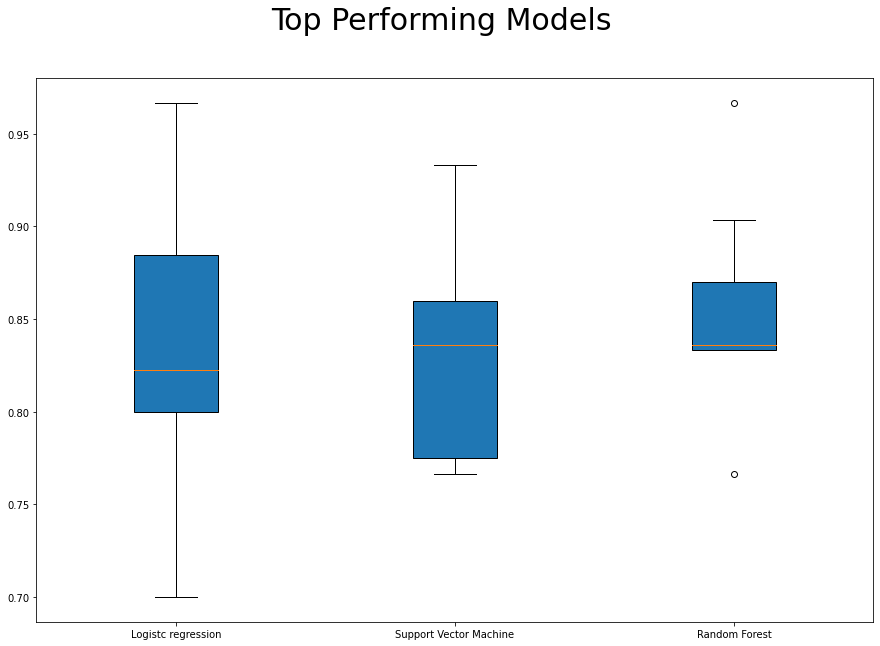

In [98]:
fig = plt.figure(figsize=(15,10))
box_plot = plt.boxplot(result,patch_artist=True,labels=names)
fig.suptitle('Top Performing Models', fontsize = 30)